# Credit EDA Case Study
##    -- Submitted by Anand Mohan and Akshit Nair

In [1]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading data from file: application_data
App_Backup = pd.read_csv("application_data.csv")

In [2]:
#Creating a copy of the dataframe to reduce read from the source each time a rerun is required
App_History = App_Backup.copy()

In [3]:
App_History.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Finding percentage of null values in each column
pct_null = (App_History.isnull().sum() / len(App_History))*100

#### Our assupmption is that columns which have more than 13% of its values as null values make no significance and hence it has to be removed from the dataframe

In [5]:
#Find the columns having more than 13% missing values
missing_cols = pct_null[pct_null > 13].index
#Drop the columns identified above
App_History.drop(missing_cols, axis=1, inplace=True)

In [7]:
App_History.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Calulating the % of null values again after removing the unnecessary columns
pct_null = (App_History.isnull().sum() / len(App_History))*100

In [7]:
#Columns and its percentage of missing values
pct_null[pct_null > 0]

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
NAME_TYPE_SUITE             0.420148
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

In [8]:
#Looking at the column values to understand the data better
null_cols = pct_null[pct_null > 0].index
App_History[null_cols].head(5)

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,24700.5,351000.0,Unaccompanied,1.0,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,35698.5,1129500.0,Family,2.0,0.622246,1.0,0.0,1.0,0.0,-828.0
2,6750.0,135000.0,Unaccompanied,1.0,0.555912,0.0,0.0,0.0,0.0,-815.0
3,29686.5,297000.0,Unaccompanied,2.0,0.650442,2.0,0.0,2.0,0.0,-617.0
4,21865.5,513000.0,Unaccompanied,1.0,0.322738,0.0,0.0,0.0,0.0,-1106.0


In [9]:
#Looking at the info of the columns having null values
App_History[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
AMT_ANNUITY                 307499 non-null float64
AMT_GOODS_PRICE             307233 non-null float64
NAME_TYPE_SUITE             306219 non-null object
CNT_FAM_MEMBERS             307509 non-null float64
EXT_SOURCE_2                306851 non-null float64
OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null float64
DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null float64
OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null float64
DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null float64
DAYS_LAST_PHONE_CHANGE      307510 non-null float64
dtypes: float64(9), object(1)
memory usage: 23.5+ MB


In [10]:
App_History.shape

(307511, 65)

### Removing outliers

##### Do not Use the below command unless you have a very high computing power as it takes a lot of time

In [ ]:
#Removing outliers in all columns where there are values beyond 3 Standard Deviations

#App_History = App_History[App_History.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#or
#from scipy import stats
#App_History = App_History[(np.abs(stats.zscore(App_History)) < 3).all(axis=1)]

In [11]:
App_History[null_cols].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,307499.000000,3.072330e+05,307509.000000,3.068510e+05,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000
mean,27108.573909,5.383962e+05,2.152665,5.143927e-01,1.422245,0.143421,1.405292,0.100049,-962.858788
std,14493.737315,3.694465e+05,0.910682,1.910602e-01,2.400989,0.446698,2.379803,0.362291,826.808487
min,1615.500000,4.050000e+04,1.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,16524.000000,2.385000e+05,2.000000,3.924574e-01,0.000000,0.000000,0.000000,0.000000,-1570.000000
50%,24903.000000,4.500000e+05,2.000000,5.659614e-01,0.000000,0.000000,0.000000,0.000000,-757.000000
75%,34596.000000,6.795000e+05,3.000000,6.636171e-01,2.000000,0.000000,2.000000,0.000000,-274.000000
max,258025.500000,4.050000e+06,20.000000,8.549997e-01,348.000000,34.000000,344.000000,24.000000,0.000000


##### Looking at the above, we can see that the standard deviation of the below columns are way above the usual and the best way to remove outliers is to clip them instead of removing them so that the outliers influence would be limited to the maximum of the clip percentile values only

'AMT_ANNUITY' <br>
'AMT_GOODS_PRICE' <br>
'OBS_30_CNT_SOCIAL_CIRCLE' <br>
'DEF_30_CNT_SOCIAL_CIRCLE' <br>
'OBS_60_CNT_SOCIAL_CIRCLE' <br>
'DEF_60_CNT_SOCIAL_CIRCLE'

In [12]:
App_History['AMT_ANNUITY'] = App_History['AMT_ANNUITY'].clip((App_History['AMT_ANNUITY'].quantile(0.05)),(App_History['AMT_ANNUITY'].quantile(0.95)))
App_History['AMT_GOODS_PRICE'] = App_History['AMT_GOODS_PRICE'].clip((App_History['AMT_GOODS_PRICE'].quantile(0.05)),(App_History['AMT_GOODS_PRICE'].quantile(0.95)))
App_History['OBS_30_CNT_SOCIAL_CIRCLE'] = App_History['OBS_30_CNT_SOCIAL_CIRCLE'].clip((App_History['OBS_30_CNT_SOCIAL_CIRCLE'].quantile(0.05)),(App_History['OBS_30_CNT_SOCIAL_CIRCLE'].quantile(0.95)))
App_History['DEF_30_CNT_SOCIAL_CIRCLE'] = App_History['DEF_30_CNT_SOCIAL_CIRCLE'].clip((App_History['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.05)),(App_History['DEF_30_CNT_SOCIAL_CIRCLE'].quantile(0.95)))
App_History['OBS_60_CNT_SOCIAL_CIRCLE'] = App_History['OBS_60_CNT_SOCIAL_CIRCLE'].clip((App_History['OBS_60_CNT_SOCIAL_CIRCLE'].quantile(0.05)),(App_History['OBS_60_CNT_SOCIAL_CIRCLE'].quantile(0.95)))
App_History['DEF_60_CNT_SOCIAL_CIRCLE'] = App_History['DEF_60_CNT_SOCIAL_CIRCLE'].clip((App_History['DEF_60_CNT_SOCIAL_CIRCLE'].quantile(0.05)),(App_History['DEF_60_CNT_SOCIAL_CIRCLE'].quantile(0.95)))

#### For column DAYS_LAST_PHONE_CHANGE, the outliers are found only on the lower percentile and not on the higher percentile

In [13]:
App_History['DAYS_LAST_PHONE_CHANGE'] = App_History['DAYS_LAST_PHONE_CHANGE'].clip(Fo(App_History['DAYS_LAST_PHONE_CHANGE'].quantile(0.1)),(App_History['AMT_ANNUITY'].quantile(1)))

In [14]:
App_History[null_cols].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,307499.000000,3.072330e+05,307509.000000,3.068510e+05,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000
mean,26599.480156,5.281746e+05,2.152665,5.143927e-01,1.283983,0.114738,1.270939,0.084078,-917.952837
std,12481.752885,3.304295e+05,0.910682,1.910602e-01,1.832937,0.318706,1.823225,0.277505,736.144822
min,9000.000000,1.350000e+05,1.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-2158.000000
25%,16524.000000,2.385000e+05,2.000000,3.924574e-01,0.000000,0.000000,0.000000,0.000000,-1570.000000
50%,24903.000000,4.500000e+05,2.000000,5.659614e-01,0.000000,0.000000,0.000000,0.000000,-757.000000
75%,34596.000000,6.795000e+05,3.000000,6.636171e-01,2.000000,0.000000,2.000000,0.000000,-274.000000
max,53325.000000,1.305000e+06,20.000000,8.549997e-01,6.000000,1.000000,6.000000,1.000000,0.000000


#### From the above, we can see that after removoing the outliers, the standard deviation has reduced to a good extent and the mean and median have come close to each other forming a near normal distribution

### Imputing missing values

In [15]:
#Total null columns in the data frame
null_cols

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [16]:
#The below columns's null values can be filled with mean directly
App_History['AMT_ANNUITY'].fillna((App_History['AMT_ANNUITY'].mean()), inplace=True)
App_History['AMT_GOODS_PRICE'].fillna((App_History['AMT_GOODS_PRICE'].mean()), inplace=True)
App_History['EXT_SOURCE_2'].fillna((App_History['EXT_SOURCE_2'].mean()), inplace=True)
App_History['DAYS_LAST_PHONE_CHANGE'].fillna((App_History['DAYS_LAST_PHONE_CHANGE'].mean()), inplace=True)

In [17]:
#For the below, they can hold only interger and not float values
App_History['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(round(App_History['OBS_30_CNT_SOCIAL_CIRCLE'].mean()), inplace=True)
App_History['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(round(App_History['DEF_30_CNT_SOCIAL_CIRCLE'].mean()), inplace=True)
App_History['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(round(App_History['OBS_60_CNT_SOCIAL_CIRCLE'].mean()), inplace=True)
App_History['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(round(App_History['DEF_60_CNT_SOCIAL_CIRCLE'].mean()), inplace=True)
App_History['CNT_FAM_MEMBERS'].fillna(round(App_History['CNT_FAM_MEMBERS'].mean()), inplace=True)

In [18]:
#For the below columns, it is the best to fill with values that makes most sense
#For the column NAME_TYPE_SUITE, it is best to fill the null values with 'Unaccompanied'
App_History['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)

In [19]:
#ReCalulating the % of null values again to confirm that there are no other null columns in dataframe
pct_null = (App_History.isnull().sum() / len(App_History))*100
null_cols = pct_null[pct_null > 0].index
null_cols

Index([], dtype='object')

### Derived Column

In [20]:
    App_History['LOAN_PERIOD'] = App_History['AMT_CREDIT']/App_History['AMT_ANNUITY']

In [21]:
App_History[['AMT_CREDIT','AMT_ANNUITY','LOAN_PERIOD']].head()

,AMT_CREDIT,AMT_ANNUITY,LOAN_PERIOD
0,406597.5,24700.5,16.461104
1,1293502.5,35698.5,36.234085
2,135000.0,9000.0,15.000000
3,312682.5,29686.5,10.532818
4,513000.0,21865.5,23.461618


In [22]:
App_History['AGE'] = abs(App_History['DAYS_BIRTH'])/365.25

In [23]:
App_History['AGE'].describe()

count    307511.000000
mean         43.906900
std          11.947950
min          20.503765
25%          33.984942
50%          43.121150
75%          53.886379
max          69.073238
Name: AGE, dtype: float64

### Creating BIN for the newly created Age column

In [24]:
bins = [10,20,30,40,50,60,70]
labels = ['11-20','21-30','31-40','41-50','51-60','61-70']
App_History['AGE_BIN'] = pd.cut(App_History['AGE'], bins=bins, labels=labels)

In [25]:
App_History[['AGE','AGE_BIN']].head()

,AGE,AGE_BIN
0,25.902806,21-30
1,45.900068,41-50
2,52.145106,51-60
3,52.032854,51-60
4,54.570842,51-60


In [26]:
App_History.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,LOAN_PERIOD,AGE,AGE_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,16.461104,25.902806,21-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,36.234085,45.900068,41-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,9000.0,...,0,0,0,0,0,0,0,15.000000,52.145106,51-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,10.532818,52.032854,51-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,23.461618,54.570842,51-60


Dividing data into two dataset (Target=1 and Target=0)

In [27]:
App_History_1 = App_History[App_History['TARGET'] == 1].copy()

In [28]:
App_History_0 = App_History[App_History['TARGET'] == 0].copy()

In [29]:
App_History_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,LOAN_PERIOD,AGE,AGE_BIN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,36.234085,45.900068,41-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,9000.0,...,0,0,0,0,0,0,0,15.000000,52.145106,51-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,10.532818,52.032854,51-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,23.461618,54.570842,51-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0,0,0,17.824857,46.381930,41-50


In [30]:
App_History_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,LOAN_PERIOD,AGE,AGE_BIN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,16.461104,25.902806,21-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,1,0,0,0,0,0,36.193452,51.263518,51-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0,0,0,34.075026,47.863107,41-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0,0,0,17.767506,36.643395,31-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0,0,0,17.267962,67.882272,61-70


In [31]:
App_History_1.shape

(24825, 68)

In [32]:
App_History_0.shape

(282686, 68)

Univariate analysis for categorical variables for Target 1 and Target 0 Dataframe  App_History_1 and App_History_0

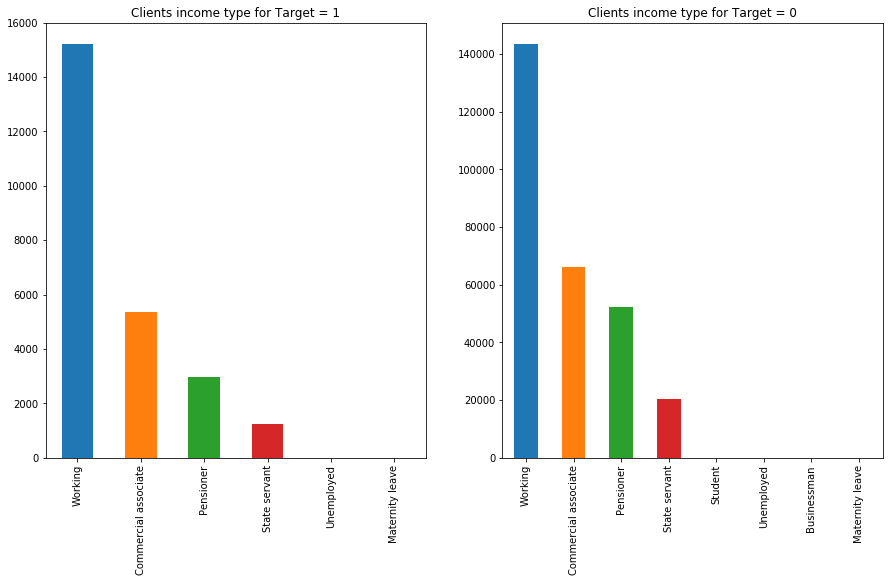

In [38]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("Clients income type for Target = 1")
App_History_1['NAME_INCOME_TYPE'].value_counts().plot.bar()

#subplot2:
plt.subplot(1,2,2)
plt.title("Clients income type for Target = 0")
App_History_0['NAME_INCOME_TYPE'].value_counts().plot.bar()

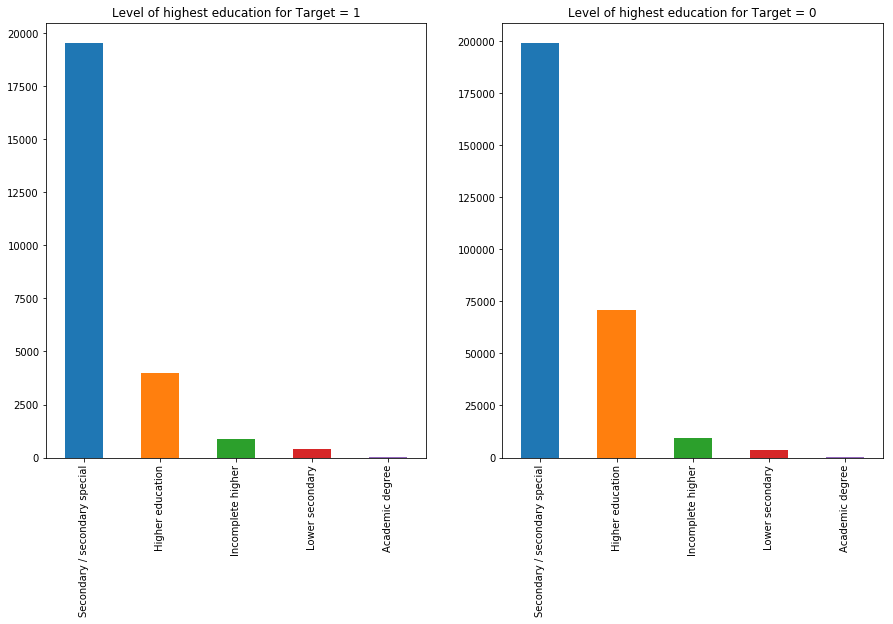

In [39]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("Level of highest education for Target = 1")
App_History_1['NAME_EDUCATION_TYPE'].value_counts().plot.bar()

#subplot2:
plt.subplot(1,2,2)
plt.title("Level of highest education for Target = 0")
App_History_0['NAME_EDUCATION_TYPE'].value_counts().plot.bar()

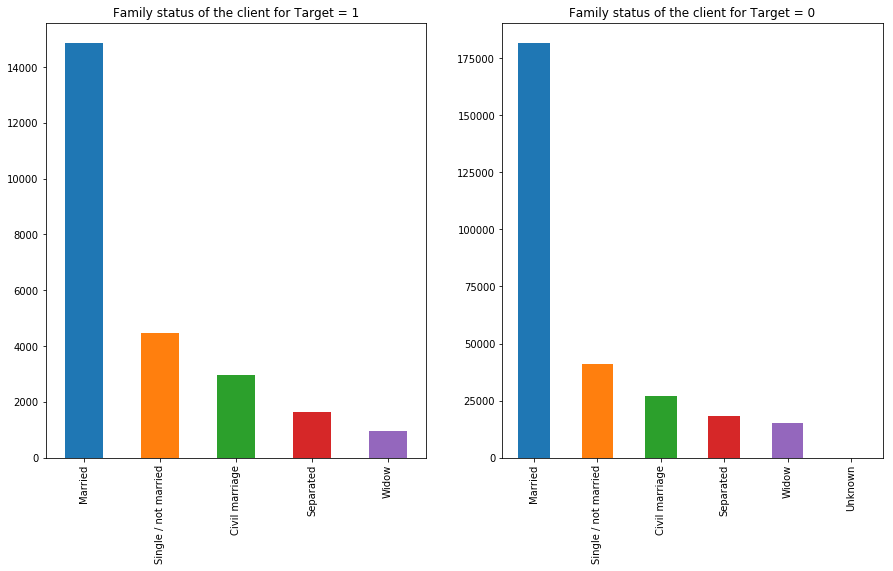

In [40]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("Family status of the client for Target = 1")
App_History_1['NAME_FAMILY_STATUS'].value_counts().plot.bar()

#subplot2:
plt.subplot(1,2,2)
plt.title("Family status of the client for Target = 0")
App_History_0['NAME_FAMILY_STATUS'].value_counts().plot.bar()

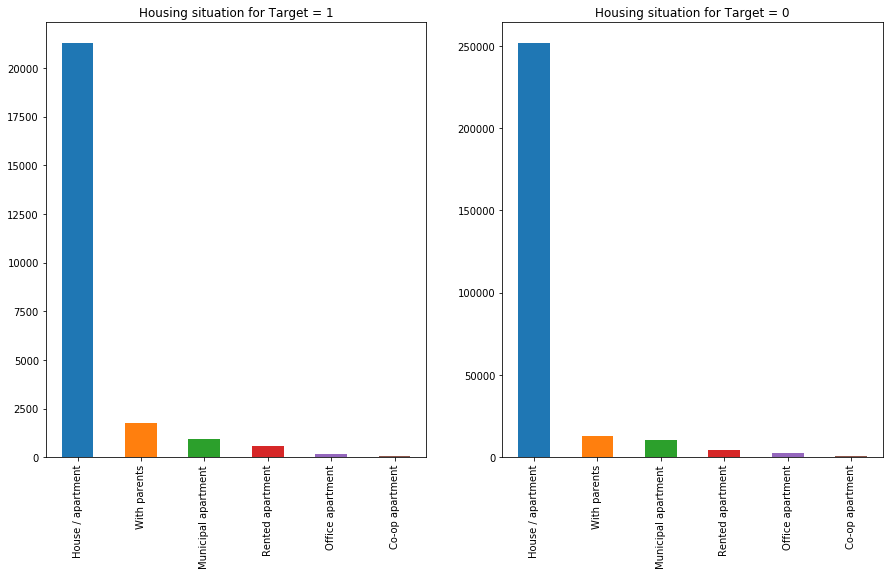

In [41]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("Housing situation for Target = 1")
App_History_1['NAME_HOUSING_TYPE'].value_counts().plot.bar()

#subplot2:
plt.subplot(1,2,2)
plt.title("Housing situation for Target = 0")
App_History_0['NAME_HOUSING_TYPE'].value_counts().plot.bar()

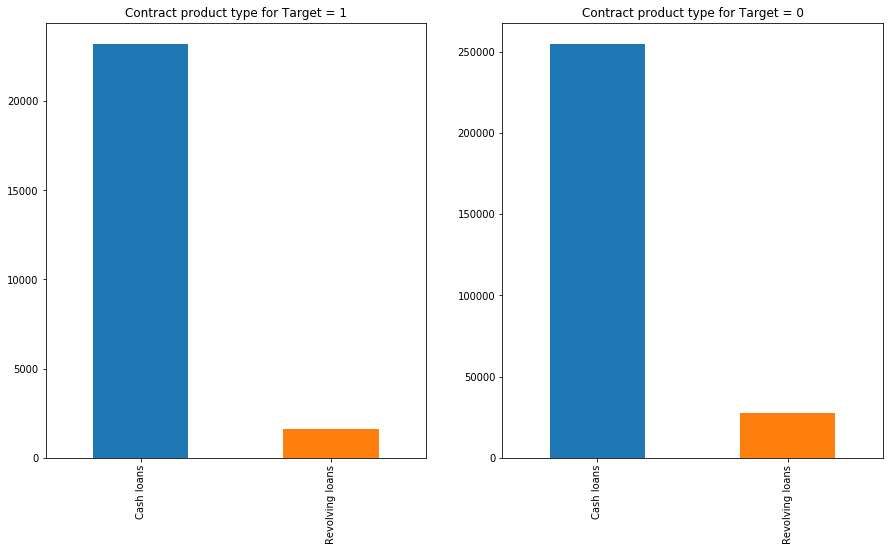

In [42]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("Contract product type for Target = 1")
App_History_1['NAME_CONTRACT_TYPE'].value_counts().plot.bar()

#subplot2:
plt.subplot(1,2,2)
plt.title("Contract product type for Target = 0")
App_History_0['NAME_CONTRACT_TYPE'].value_counts().plot.bar()

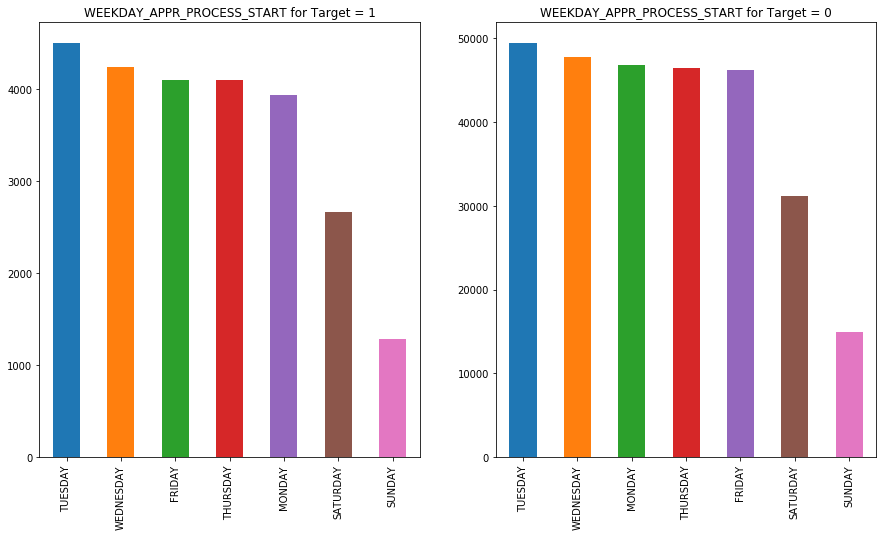

In [131]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("WEEKDAY_APPR_PROCESS_START for Target = 1")
App_History_1['WEEKDAY_APPR_PROCESS_START'].value_counts().plot.bar()

#subplot2:
plt.subplot(1,2,2)
plt.title("WEEKDAY_APPR_PROCESS_START for Target = 0")
App_History_0['WEEKDAY_APPR_PROCESS_START'].value_counts().plot.bar()

Finding Correlation when Target value is 1

In [74]:
App_History_1.corr(method ='pearson')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,LOAN_PERIOD,AGE
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.008936,-0.002455,0.006301,-0.001254,-0.005151,...,0.001327,0.007977,-0.000704,-0.005428,-0.009181,-0.006382,0.003781,0.006932,0.002812,0.001254
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.033167,-0.007467,-0.031975,0.259109,-0.191942,...,-0.002932,0.004800,-0.001079,-0.005500,0.004333,-0.001370,-0.002395,0.001136,-0.040377,-0.259109
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.045578,0.036993,0.009135,0.003096,-0.014979,...,0.003969,0.001871,0.001717,-0.000368,-0.002177,-0.000371,-0.000450,-0.000647,0.011779,-0.003096
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.757242,0.971315,0.069161,-0.135316,-0.000968,...,0.063136,0.026399,0.046752,-0.000694,0.011174,0.013442,0.016949,-0.021964,0.716227,0.135316
AMT_ANNUITY,-0.008936,NaN,0.033167,0.045578,0.757242,1.000000,0.762169,0.069178,-0.014888,-0.085169,...,0.023640,0.012842,-0.006509,-0.005508,-0.036246,-0.001614,-0.000751,-0.031254,0.158894,0.014888
AMT_GOODS_PRICE,-0.002455,NaN,-0.007467,0.036993,0.971315,0.762169,1.000000,0.077865,-0.140579,0.005584,...,0.050747,0.022961,0.033291,0.001443,0.001441,0.009337,0.016504,-0.020980,0.687467,0.140579
REGION_POPULATION_RELATIVE,0.006301,NaN,-0.031975,0.009135,0.069161,0.069178,0.077865,1.000000,-0.048190,0.015103,...,0.040562,0.008427,0.000660,-0.001318,0.006386,-0.002781,0.000954,0.006929,0.041847,0.048190
DAYS_BIRTH,-0.001254,NaN,0.259109,0.003096,-0.135316,-0.014888,-0.140579,-0.048190,1.000000,-0.575097,...,0.012295,0.013390,0.004622,-0.000218,0.028133,0.000485,0.000057,0.033808,-0.209365,-1.000000
DAYS_EMPLOYED,-0.005151,NaN,-0.191942,-0.014979,-0.000968,-0.085169,0.005584,0.015103,-0.575097,1.000000,...,-0.012708,-0.007609,-0.028779,-0.003640,-0.027966,-0.008025,-0.008567,-0.008600,0.103207,0.575097


In [43]:
corr_result_1 = App_History_1.corr(method ='pearson')

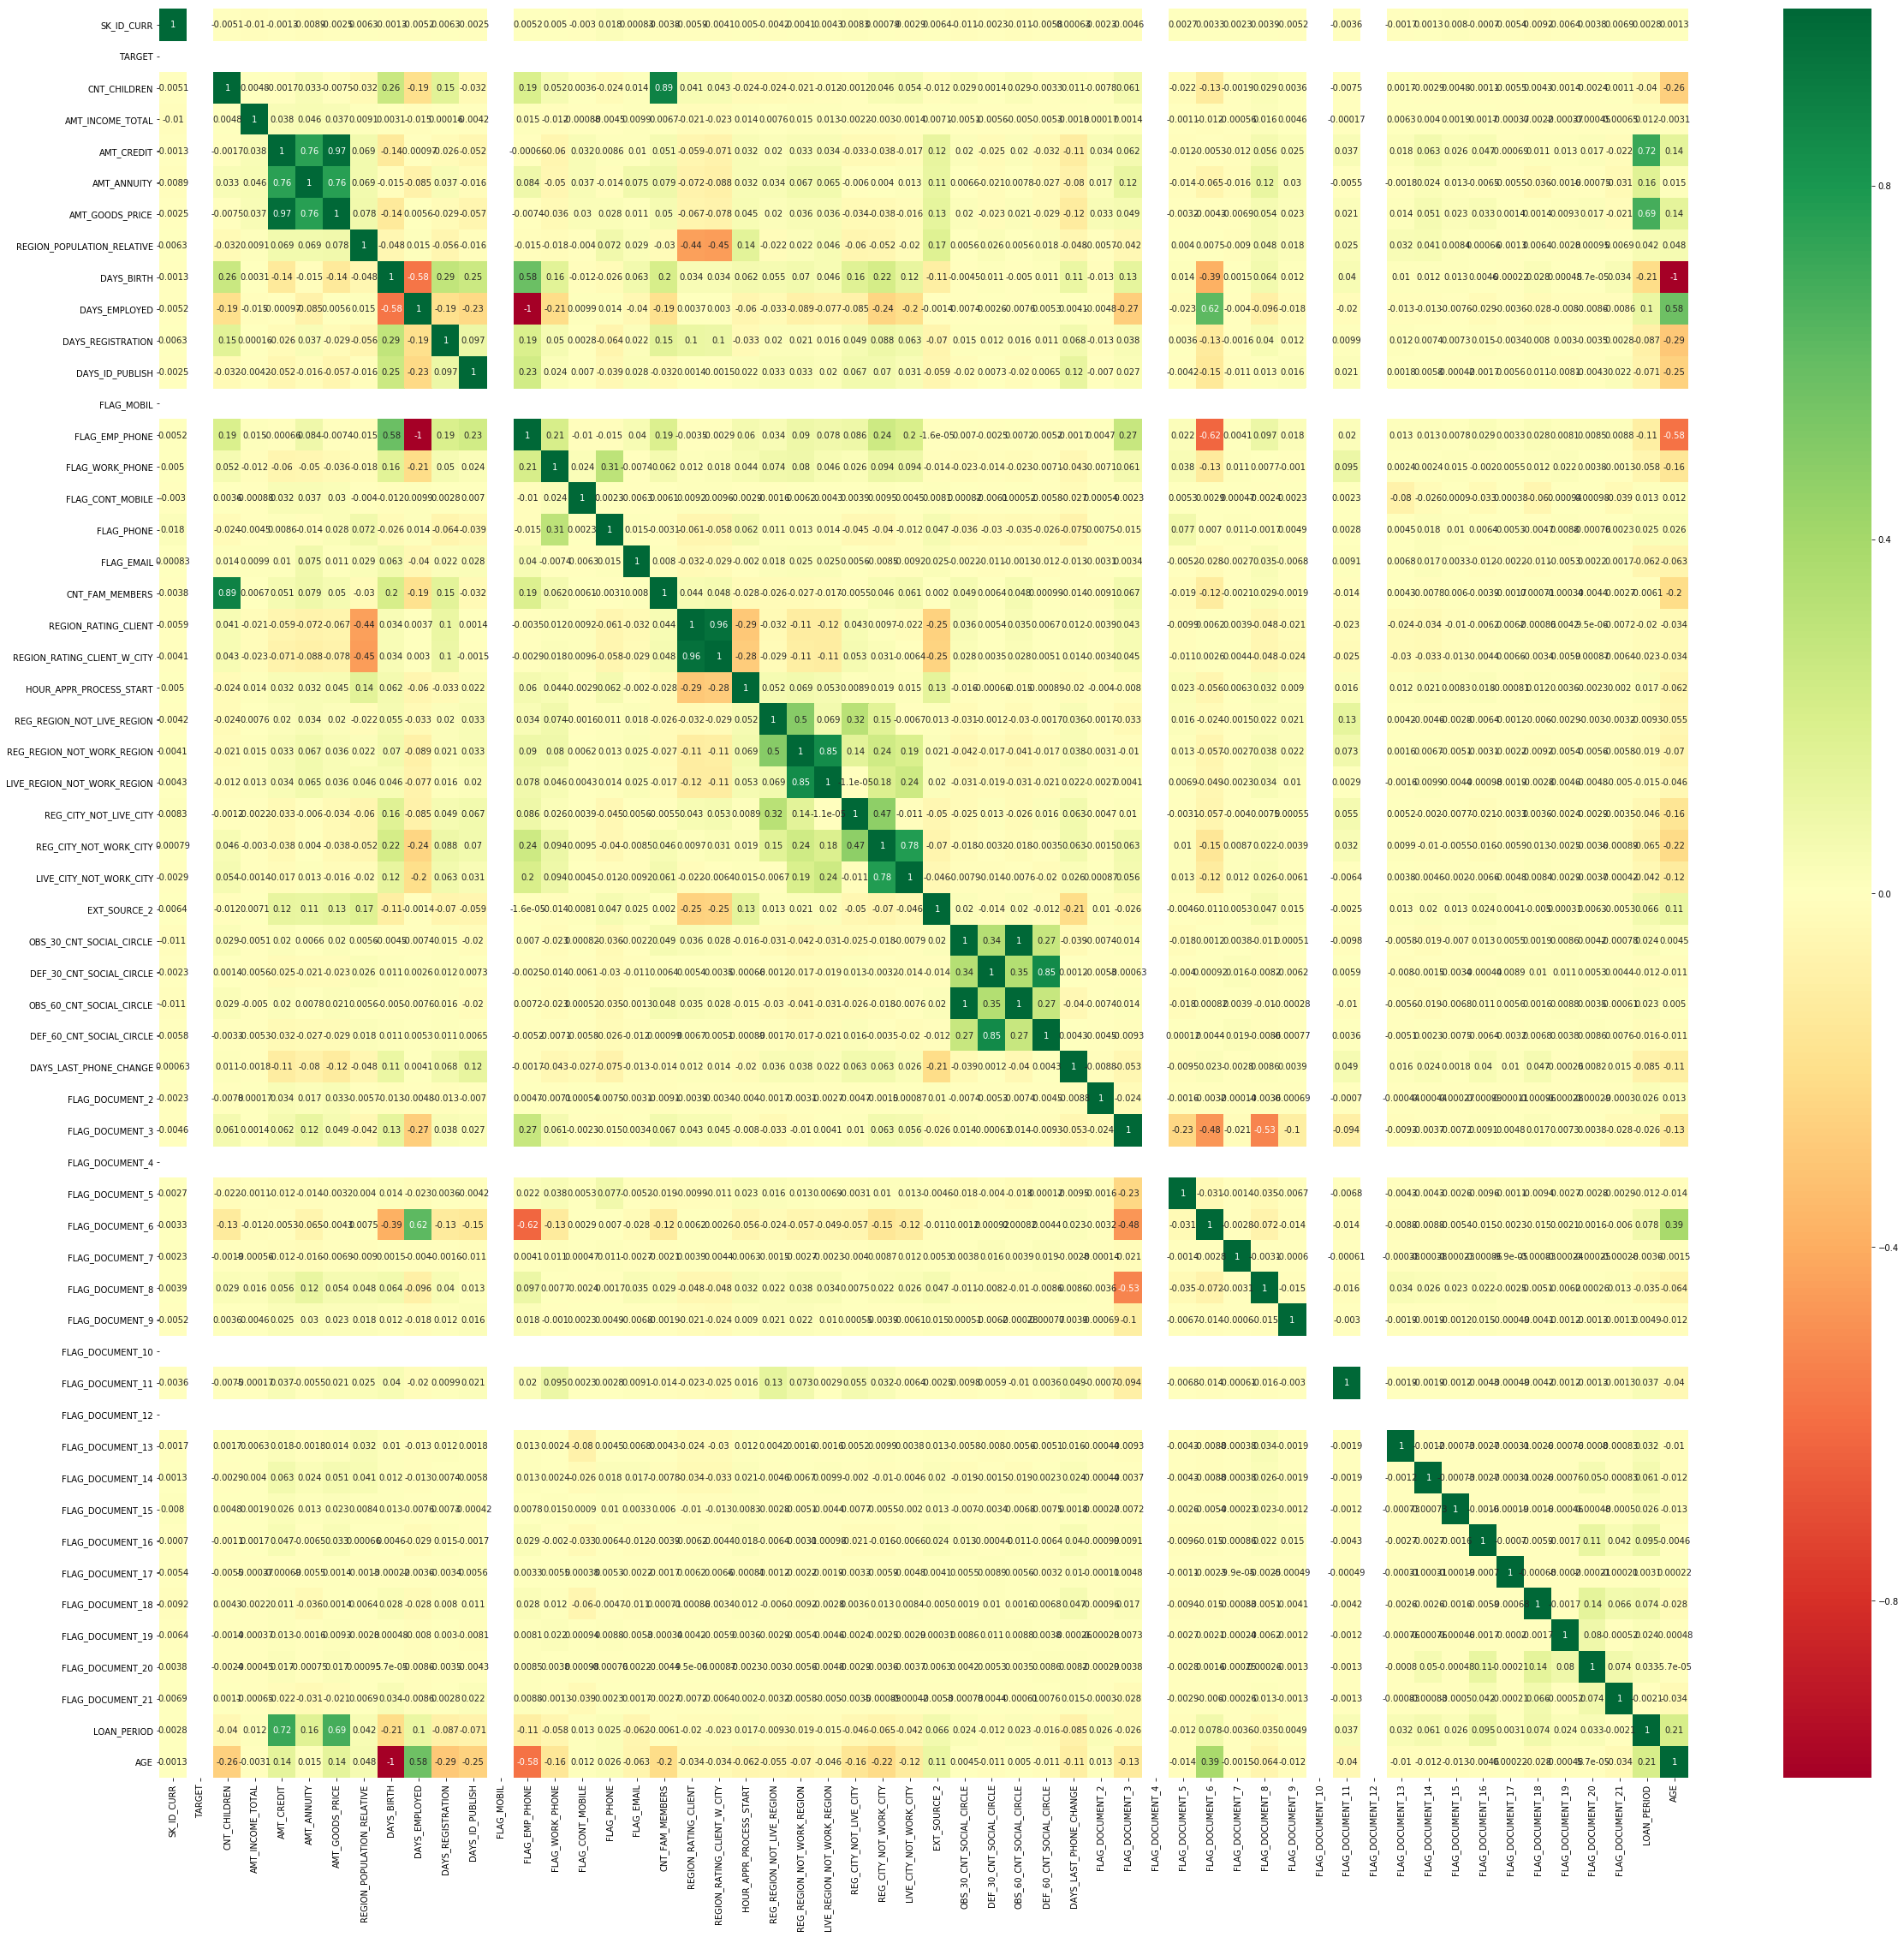

In [44]:
# figure size
plt.figure(figsize=(40,38))

# heatmap
#sns.heatmap(SubSector_Insights, cmap="YlGnBu", annot=True)
sns.heatmap(corr_result_1, cmap="RdYlGn", annot=True)
plt.show()

Finding correlation when Target Value is 0

In [76]:
App_History_0.corr(method ='pearson')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,LOAN_PERIOD,AGE
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000857,-0.000344,0.000360,-0.001346,0.001744,...,-0.001236,0.002330,-0.000753,0.001776,0.001194,0.000676,0.000832,-0.000485,-0.000238,0.001346
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.022770,-0.000427,-0.024363,0.336966,-0.243356,...,-0.005455,0.003710,0.011775,0.001160,0.004181,0.001078,0.001302,-0.002983,-0.022970,-0.336966
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.393361,0.336740,0.167851,0.062609,-0.141250,...,0.045590,0.023814,0.015800,0.005141,0.008214,0.005762,0.000840,-0.000869,0.128609,-0.062609
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.789433,0.968958,0.100604,-0.047378,-0.072515,...,0.047987,0.032411,0.062477,0.012188,0.035527,0.021560,0.032151,-0.015602,0.730078,0.047378
AMT_ANNUITY,0.000857,NaN,0.022770,0.393361,0.789433,1.000000,0.799784,0.114247,0.014333,-0.113822,...,0.024888,0.014442,0.005627,0.002681,-0.013002,0.005153,0.012696,-0.020854,0.237175,-0.014333
AMT_GOODS_PRICE,-0.000344,NaN,-0.000427,0.336740,0.968958,0.799784,1.000000,0.098262,-0.048621,-0.071878,...,0.037617,0.026415,0.047810,0.008974,0.023923,0.017681,0.027318,-0.015479,0.702746,0.048621
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.114247,0.098262,1.000000,-0.025244,-0.006961,...,0.031534,0.009271,0.006187,0.007668,0.013496,0.002656,-0.000112,0.003275,0.034405,0.025244
DAYS_BIRTH,-0.001346,NaN,0.336966,0.062609,-0.047378,0.014333,-0.048621,-0.025244,1.000000,-0.618048,...,0.032737,0.013589,0.026393,0.008606,0.046491,0.003977,0.009797,0.026466,-0.092507,-1.000000
DAYS_EMPLOYED,0.001744,NaN,-0.243356,-0.141250,-0.072515,-0.113822,-0.071878,-0.006961,-0.618048,1.000000,...,-0.024390,-0.014934,-0.044311,-0.007520,-0.041577,-0.010249,-0.010267,-0.008285,0.001182,0.618048


Finding highest correlated variables 

In [34]:
result_0 = App_History_0.corr(method ='pearson')

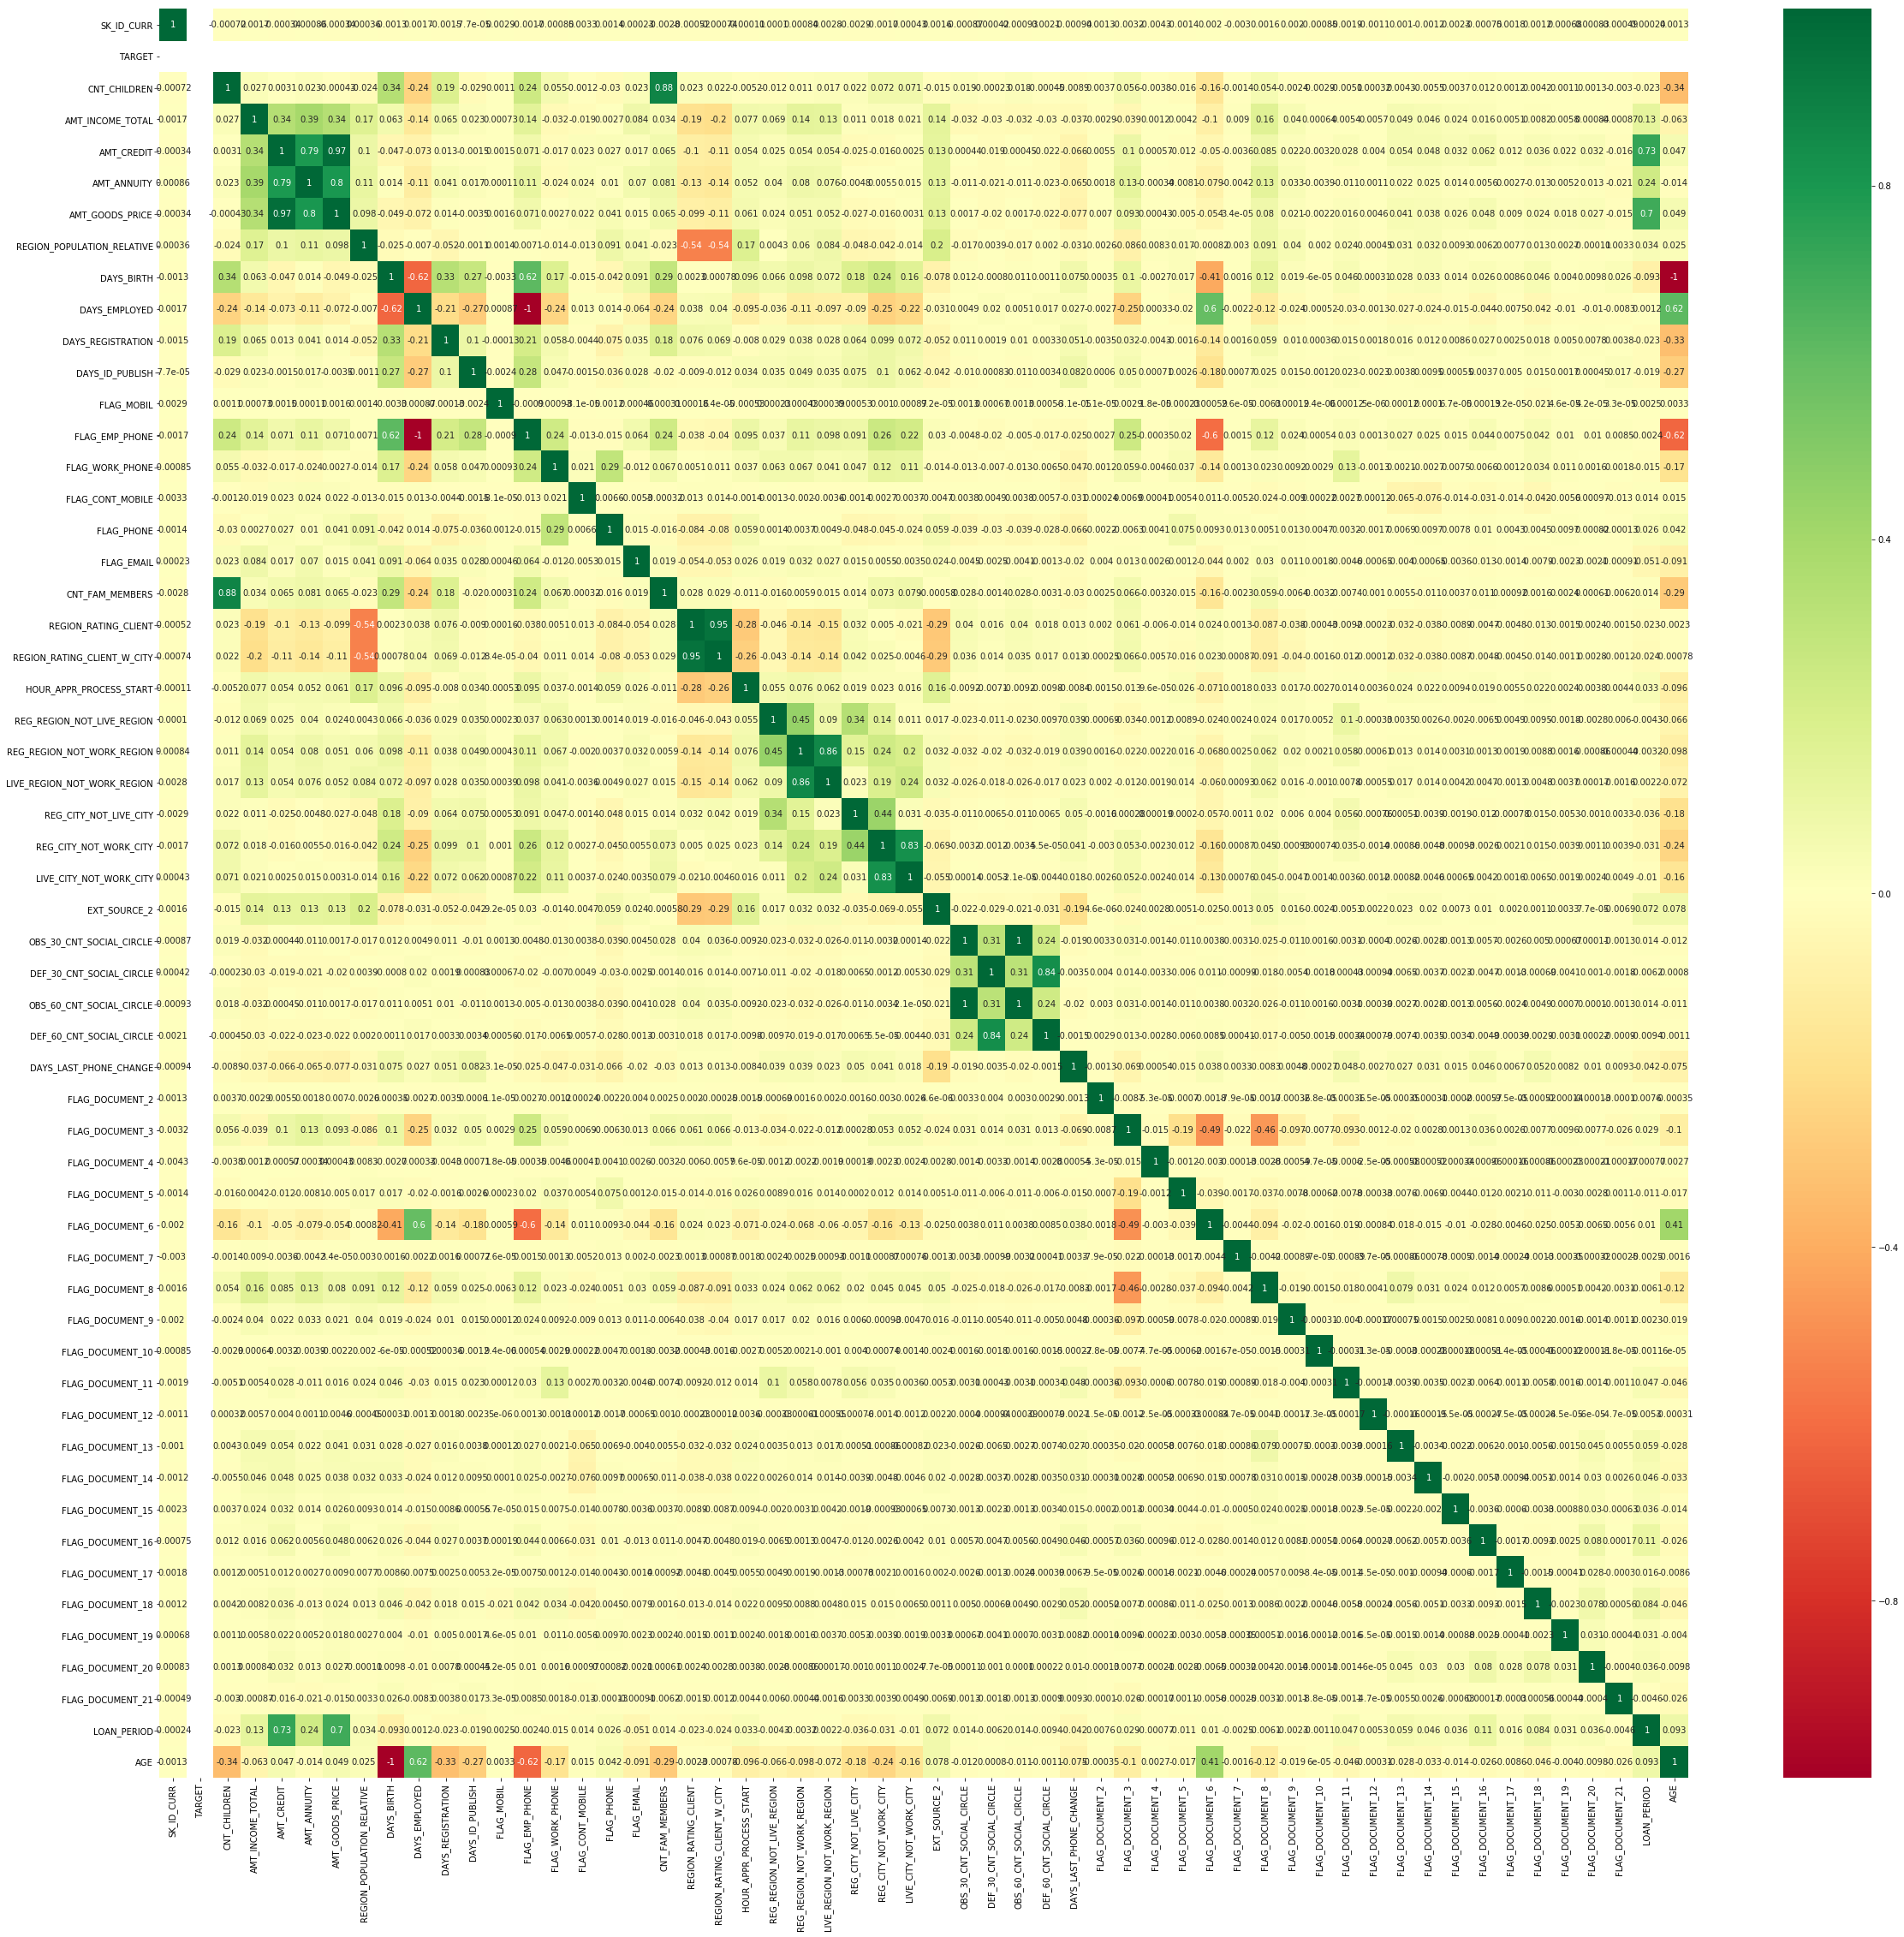

In [37]:
# figure size
plt.figure(figsize=(40,38))

# heatmap
#sns.heatmap(SubSector_Insights, cmap="YlGnBu", annot=True)
sns.heatmap(result_0, cmap="RdYlGn", annot=True)
plt.show()

Perform univariate for numerical variables for target value with 0 and 1

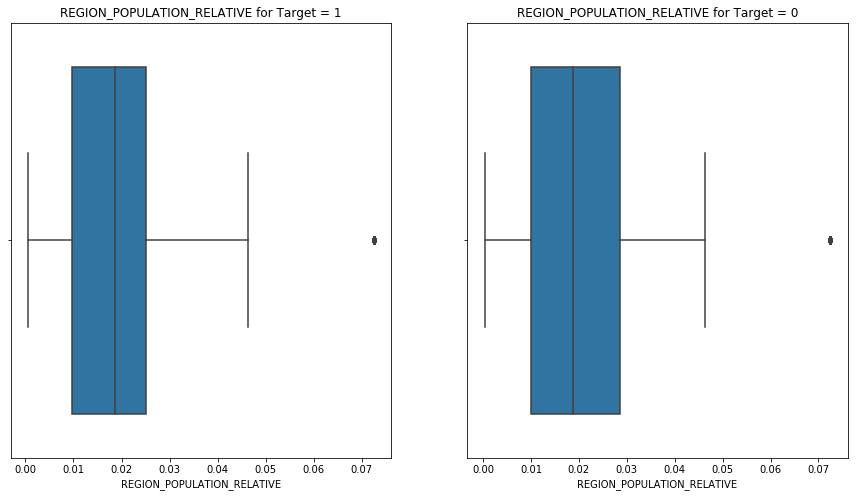

In [137]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("REGION_POPULATION_RELATIVE for Target = 1")
sns.boxplot(App_History_1.REGION_POPULATION_RELATIVE)

#subplot2:
plt.subplot(1,2,2)
plt.title("REGION_POPULATION_RELATIVE for Target = 0")
sns.boxplot(App_History_0.REGION_POPULATION_RELATIVE)

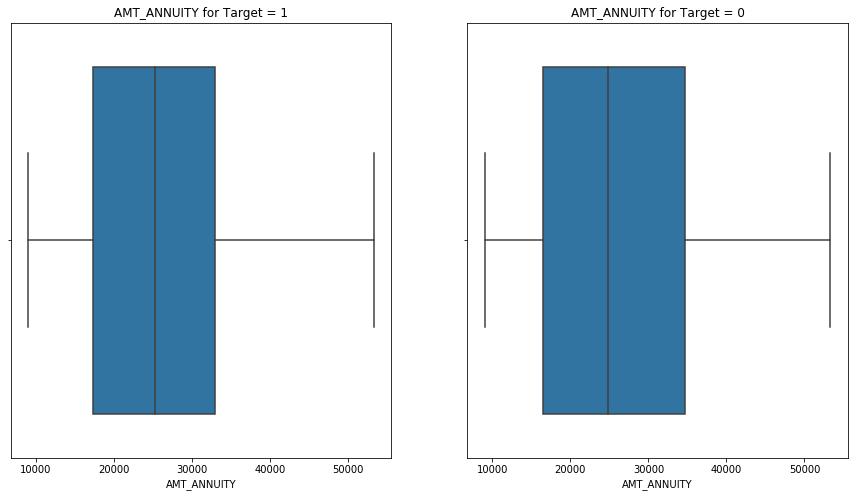

In [140]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("AMT_ANNUITY for Target = 1")
sns.boxplot(App_History_1.AMT_ANNUITY)

#subplot2:
plt.subplot(1,2,2)
plt.title("AMT_ANNUITY for Target = 0")
sns.boxplot(App_History_0.AMT_ANNUITY)

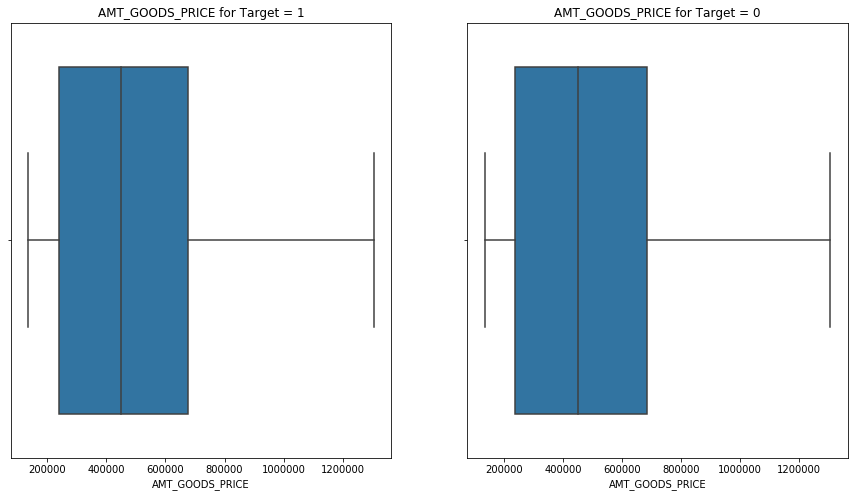

In [141]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("AMT_GOODS_PRICE for Target = 1")
sns.boxplot(App_History_1.AMT_GOODS_PRICE)

#subplot2:
plt.subplot(1,2,2)
plt.title("AMT_GOODS_PRICE for Target = 0")
sns.boxplot(App_History_0.AMT_GOODS_PRICE)

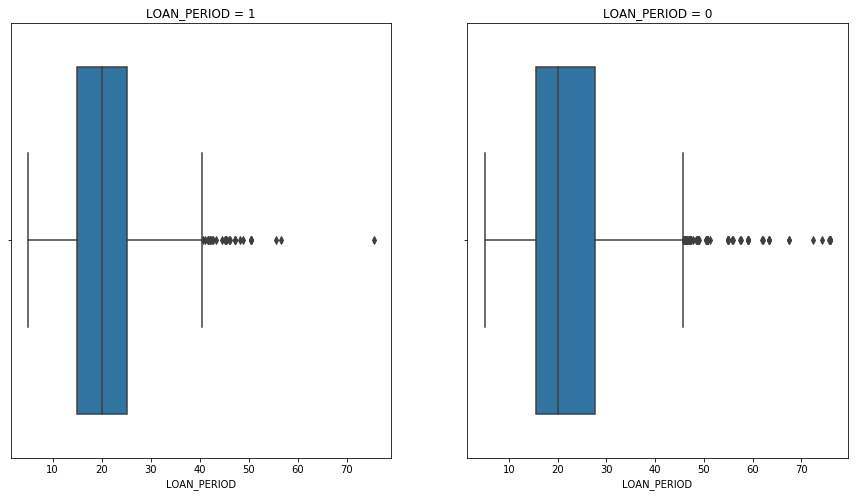

In [143]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("LOAN_PERIOD = 1")
sns.boxplot(App_History_1.LOAN_PERIOD)

#subplot2:
plt.subplot(1,2,2)
plt.title("LOAN_PERIOD = 0")
sns.boxplot(App_History_0.LOAN_PERIOD)

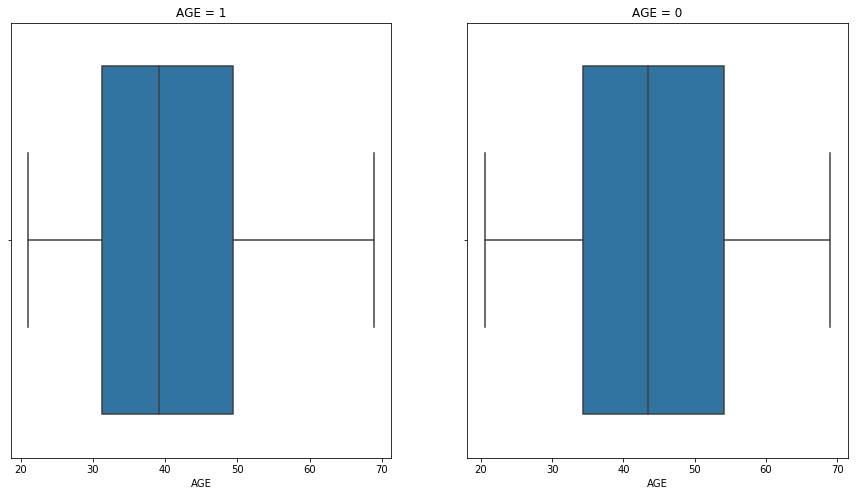

In [144]:
plt.figure(figsize=(15,8))

#subplot1:
plt.subplot(1,2,1)
plt.title("AGE = 1")
sns.boxplot(App_History_1.AGE)

#subplot2:
plt.subplot(1,2,2)
plt.title("AGE = 0")
sns.boxplot(App_History_0.AGE)

Perform bivariate analysis for numerical variables for target value 0 and 1

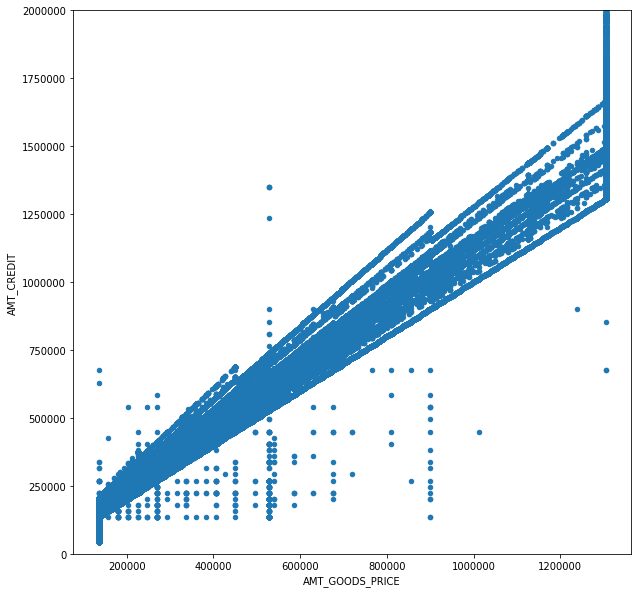

In [163]:
App_History_0.plot(kind="scatter", 
              x="AMT_GOODS_PRICE",  
              y="AMT_CREDIT",   
              figsize=(10,10),
              ylim=(0,2000000)) 

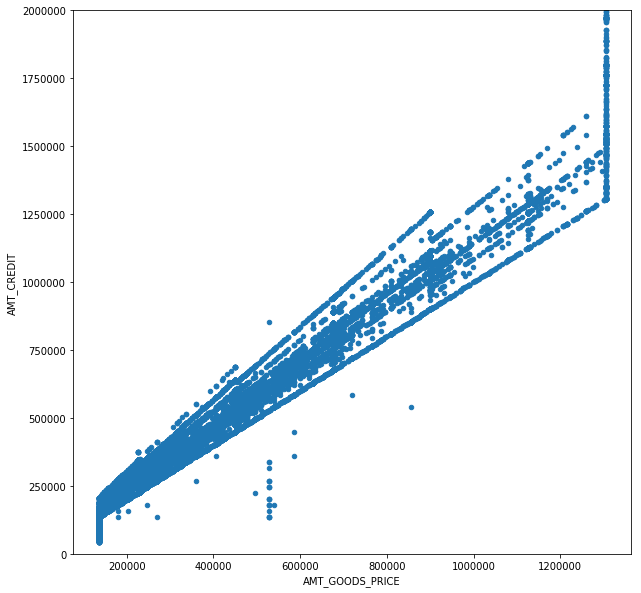

In [164]:
App_History_1.plot(kind="scatter", 
              x="AMT_GOODS_PRICE",  
              y="AMT_CREDIT",   
              figsize=(10,10),
              ylim=(0,2000000))

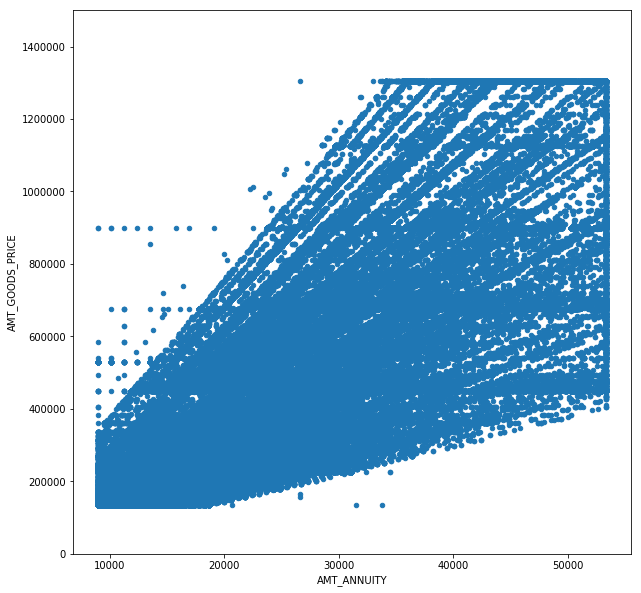

In [183]:
App_History_0.plot(kind="scatter", 
              x="AMT_ANNUITY",  
              y="AMT_GOODS_PRICE",   
              figsize=(10,10),
              ylim=(0,1500000))

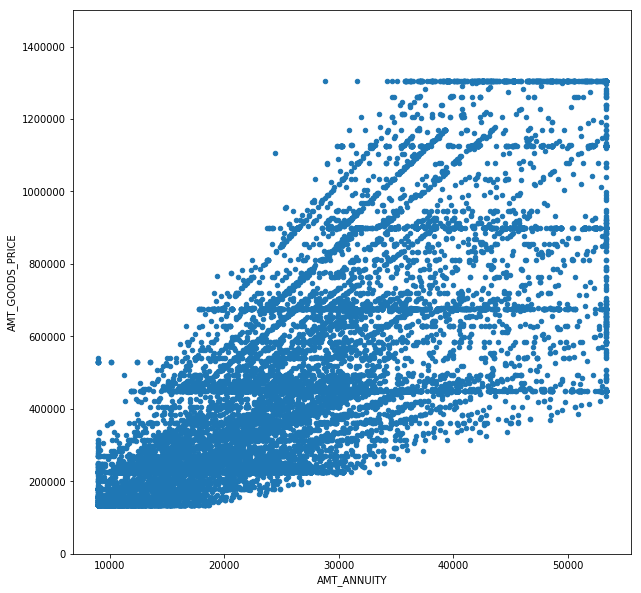

In [184]:
App_History_1.plot(kind="scatter", 
              x="AMT_ANNUITY",  
              y="AMT_GOODS_PRICE",   
              figsize=(10,10),
              ylim=(0,1500000))

In [46]:
#Reading data from file: previous_application
App_Backup1 = pd.read_csv("previous_application.csv")
App_Previous = App_Backup1.copy()

In [117]:
#Merging Dataframe
#Merged_App = pd.merge(App_History, App_Previous, on='SK_ID_CURR')
#Merged_App.head()
#App_History_0['SK_ID_CURR'].value_counts().plot.bar()

In [185]:
App_Previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Univariate Analysis for Previous Application dataset

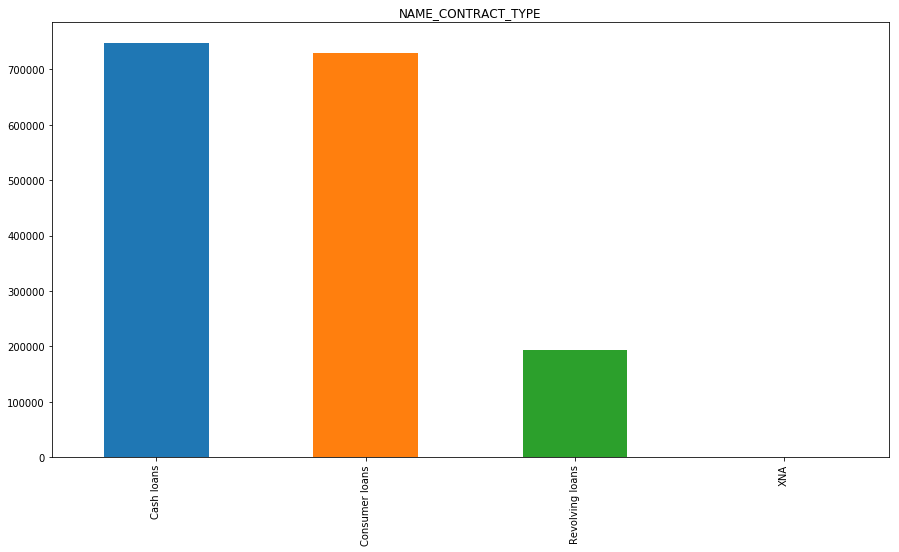

In [187]:
plt.figure(figsize=(15,8))


plt.title("NAME_CONTRACT_TYPE")
App_Previous['NAME_CONTRACT_TYPE'].value_counts().plot.bar()

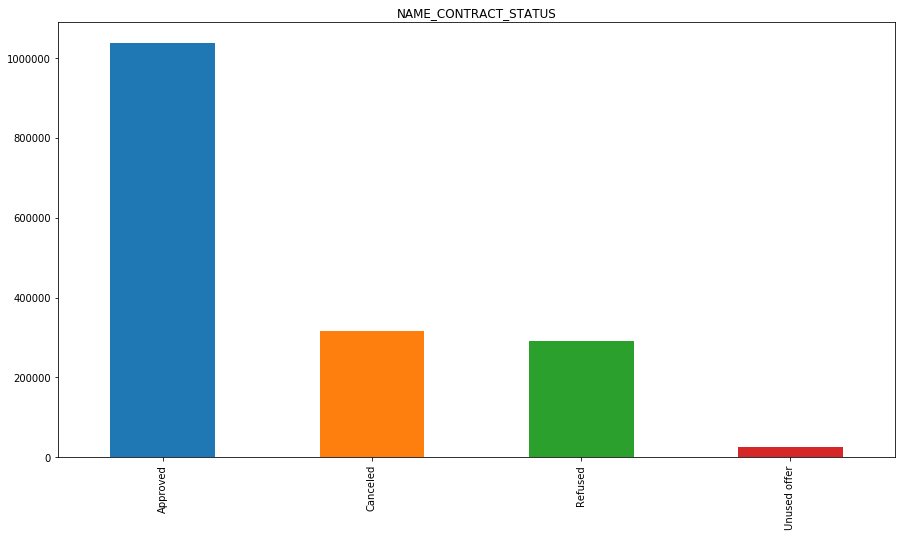

In [188]:
plt.figure(figsize=(15,8))


plt.title("NAME_CONTRACT_STATUS")
App_Previous['NAME_CONTRACT_STATUS'].value_counts().plot.bar()


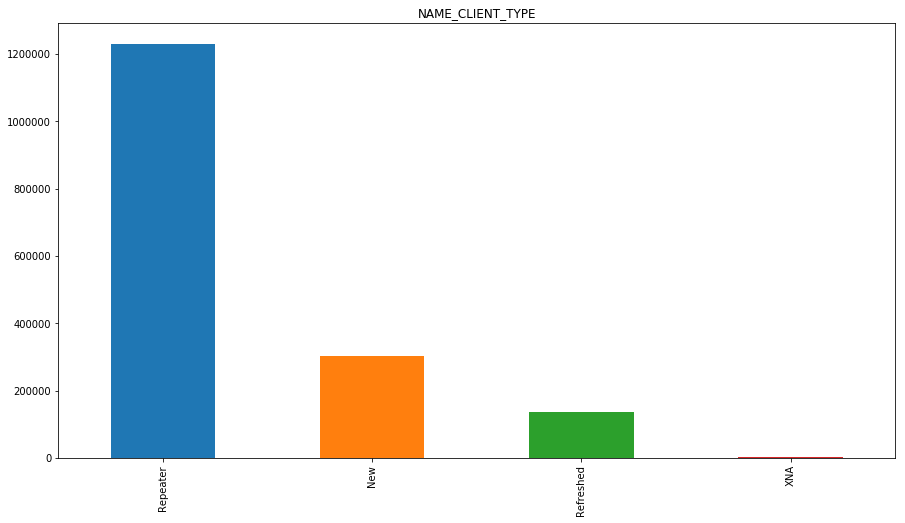

In [189]:
plt.figure(figsize=(15,8))


plt.title("NAME_CLIENT_TYPE")
App_Previous['NAME_CLIENT_TYPE'].value_counts().plot.bar()

In [ ]:
Bivariate analysis

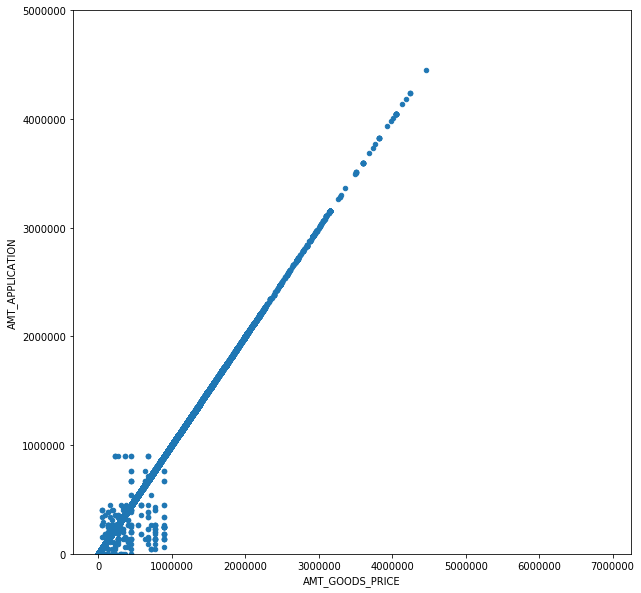

In [199]:
App_Previous.plot(kind="scatter", 
              x="AMT_GOODS_PRICE",  
              y="AMT_APPLICATION",   
              figsize=(10,10),
              ylim=(0,5000000))

NOte: Linear relation between AMT_APPLICATION and AMT_GOODS_PRICE

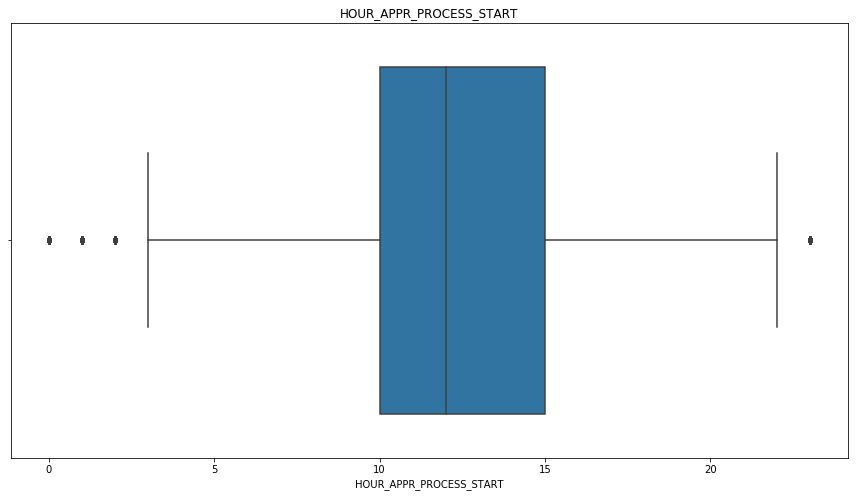

In [200]:
plt.figure(figsize=(15,8))

plt.title("HOUR_APPR_PROCESS_START")
sns.boxplot(App_Previous.HOUR_APPR_PROCESS_START)

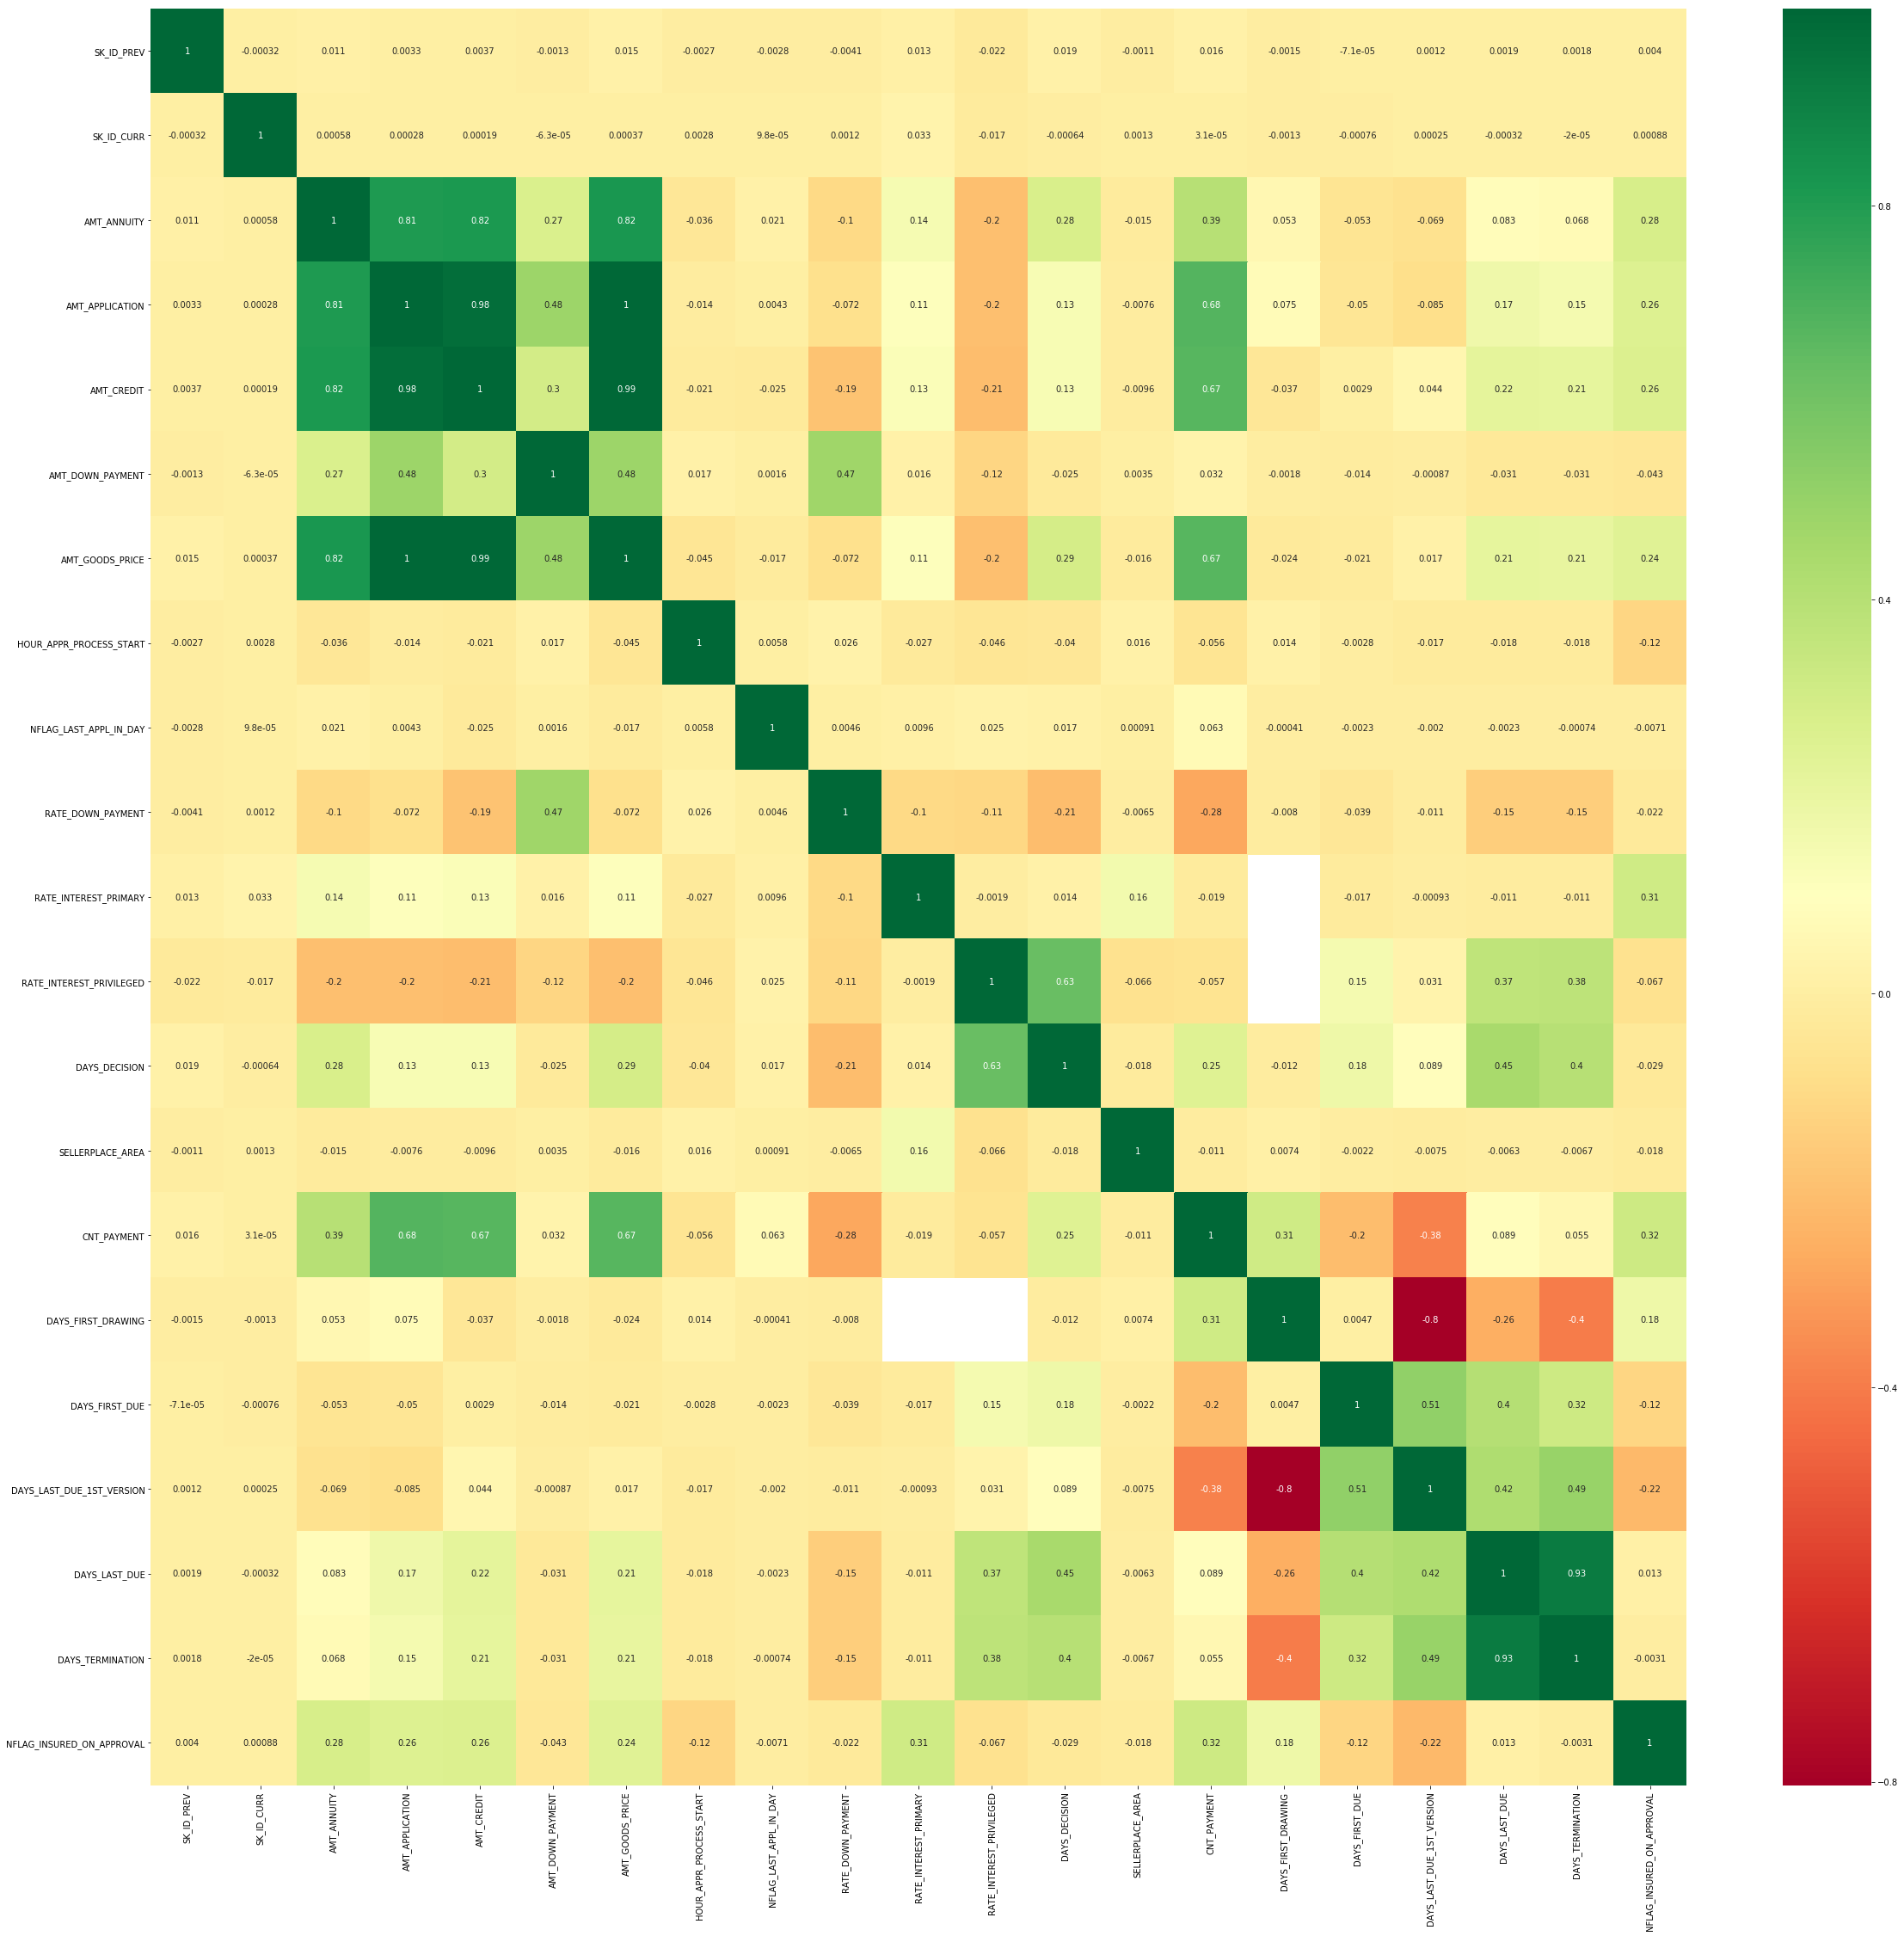

In [47]:
result_App_Previous = App_Previous.corr(method ='pearson')
# figure size
plt.figure(figsize=(40,38))

# heatmap
#sns.heatmap(SubSector_Insights, cmap="YlGnBu", annot=True)
sns.heatmap(result_App_Previous, cmap="RdYlGn", annot=True)
plt.show()

End